In [1]:
"""
Notebook conclusion - my wishart lpdf appears to be a scalar multiple of
the scipy version. The scalar multiple seems to be a function of the df parameter
"""

import pyext.src.lpdf as lpdf
import pyext.src.lpmf as lpmf
import pyext.src.log_prob as lprob
import pyext.src.pynet_rng as rv
import pyext.src.check as check
import pyext.src.workspace as ws

import jax.numpy as jnp
from jax.scipy.linalg import inv, cholesky

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wishart, chi2



In [116]:

p = 9
cov = np.eye(p)
cov[np.tril_indices(p, k=-1)] = 0.3
cov = cov + cov.T
check.cov(cov)
df = p
V = (1/ p) * inv(cov)

X = rv.wishart(ws.key, V, df, p)  
X = np.array(X)


X = sp.stats.wishart.rvs(df=df, scale=V)
del cov
check.cov(X)
check.cov(V)
lwish = lprob.wishart(p)

def scale(X, a):
    X = np.array(X)
    X = X + a/2
    X[np.diag_indices(len(X))] = X[np.diag_indices(len(X))] + a
    return X



def rmsd(A, B):
    """
    return the mean distance squared
    """
    return jnp.sqrt(jnp.mean(jnp.power(A - B, 2)))
    

def do_experiment(X, V, df, xlim, stepsize):
    xs = np.arange(xlim[0], xlim[1], stepsize)
    ys = np.zeros(len(xs))
    ds = np.zeros(len(xs))
    trues = np.zeros(len(xs))
    
    Xog = np.array(X)
    V = np.array(V)
    check.cov(Xog)
    check.cov(V)

    for i, exp in enumerate(xs):
        X = scale(Xog, exp)
        check.cov(X)
        ys[i] = np.array(lwish(X=X, V=V, df=df))
        ds[i] = rmsd(X, V)
        
        trues[i] = wishart.logpdf(x=X, df=df, scale=V)
    return xs, ys, ds, trues

def plot_wish_lpdf(xs, ys, xlabel="scale factor", ylabel="log probability"):
    plt.plot(xs, ys, 'k.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def pairplot(xs, ys, ds, X=X, V=V, df=df):
    fig, axs = plt.subplots(1, 2)
    ax = axs[0]
    ax.plot(xs, ys, 'k.')
    ax.set_ylabel("log probability")
    ax.set_xlabel("scale factor")
    
    ax = axs[1]
    ax.plot(ds, ys, 'k.')
    ax.set_xlabel("mean distance squared")
    y = lwish(X, V, df)
    ax.plot(rmsd(X, V), y, 'co', label="true rmsd")
    ax.legend()
    plt.suptitle(f"df = {df}")
    return ax

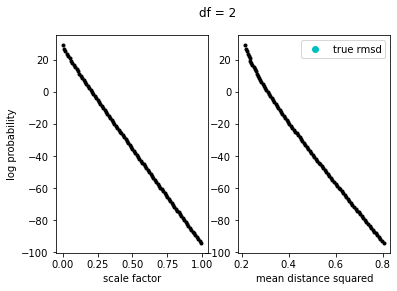

In [117]:
# Setting the df parameter
# The degrees of freedom
xs, ys, ds, trues = do_experiment(X, V, df, (0, 1), stepsize=0.01)
ax = pairplot(xs, ys, ds, df=2)

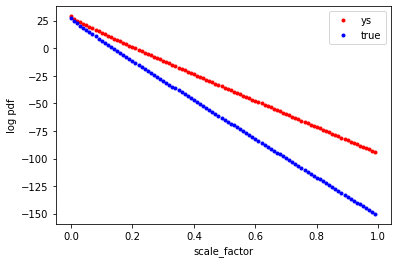

In [118]:
plt.plot(xs, ys, 'r.', label="ys")
plt.plot(xs, trues, 'b.', label="true")
plt.legend()
plt.ylabel("log pdf")
plt.xlabel("scale_factor")
plt.show()

In [124]:
import jax.scipy as jsp
x = np.arange(1, 2, 0.1)
y = sp.special.multigammaln(x, 1)
y2 = jsp.special.multigammaln(x, 1)

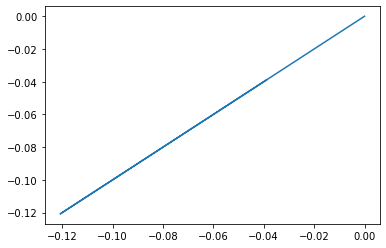

In [125]:
plt.plot(y, y2)

<AxesSubplot:xlabel='mean distance squared'>

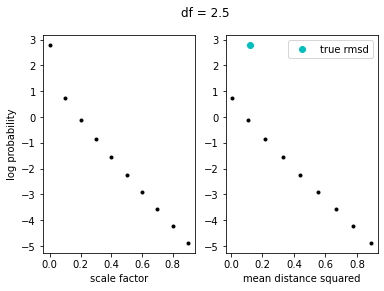

In [42]:
# Setting the df parameter
# The degrees of freedom
xs, ys, ds, trues = do_experiment(X, V, 2.5, (0, 1), stepsize=0.1)
pairplot(xs, ys, ds, df=2.5)

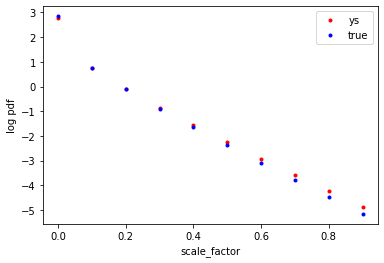

In [43]:
plt.plot(xs, ys, 'r.', label="ys")
plt.plot(xs, trues, 'b.', label="true")
plt.legend()
plt.ylabel("log pdf")
plt.xlabel("scale_factor")
plt.show()

<AxesSubplot:xlabel='mean distance squared'>

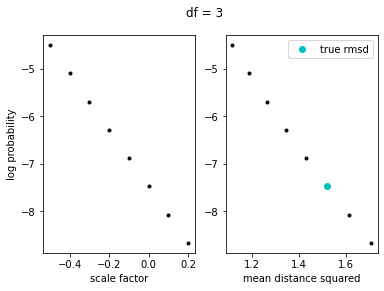

In [6]:
xs, ys, ds, trues = do_experiment(X, V, 3, (-0.5, 0.25), 0.1)
pairplot(xs, ys, ds, df=3)

<AxesSubplot:xlabel='mean distance squared'>

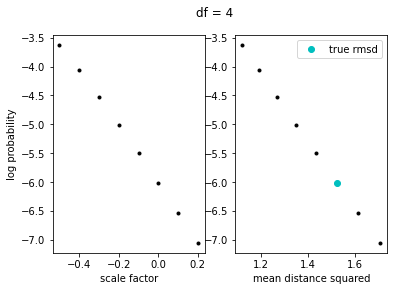

In [7]:
xs, ys, ds, trues = do_experiment(X, V, 4, (-0.5, 0.25), 0.1)
pairplot(xs, ys, ds, df=4)

<AxesSubplot:xlabel='mean distance squared'>

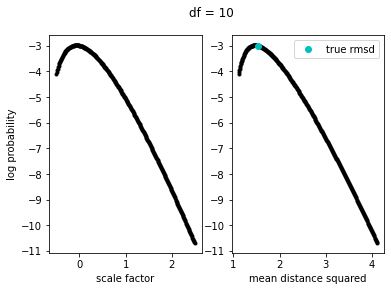

In [8]:
xs, ys, ds, trues = do_experiment(X, V, 10, (-0.5, 2.5), 0.01)
pairplot(xs, ys, ds, df=10)

In [9]:
def plot_true(xs, ys, trues):
    plt.figure(figsize=(4, 5))
    plt.plot(xs, ys, label="ys")
    plt.plot(xs, trues, label="true")
    plt.legend()
    plt.show()


<AxesSubplot:xlabel='mean distance squared'>

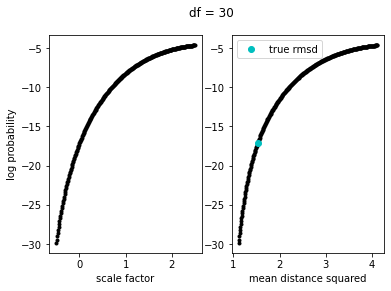

In [10]:
xs, ys, ds, trues = do_experiment(X, V, 30, (-0.5, 2.5), 0.01)
pairplot(xs, ys, ds, df=30)

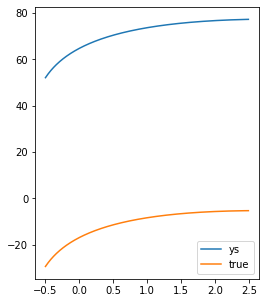

In [11]:
plot_true(xs, ys + 82, trues)

<AxesSubplot:xlabel='mean distance squared'>

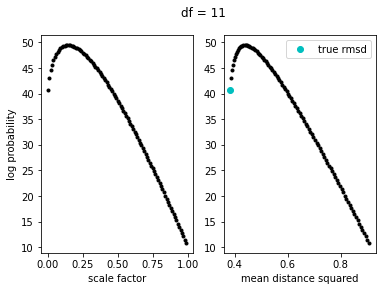

In [56]:
p=11
V = np.eye(p) / p
check.cov(V)
df = p
#X = rv.wishart(ws.key, V, n=df, p=p)
X = sp.stats.wishart.rvs(scale=V, df=df)
check.cov(V)
check.cov(X)

xs, ys, ds, trues = do_experiment(X, V, df, (0, 1), 0.01)
pairplot(xs, ys, ds, df=df, X=X, V=V)

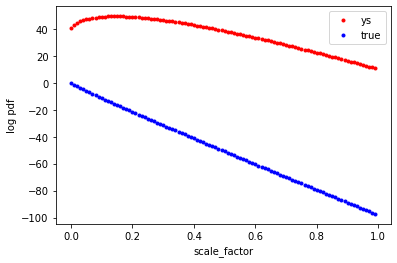

In [57]:
plt.plot(xs, ys, 'r.', label="ys")
plt.plot(xs, trues, 'b.', label="true")
plt.legend()
plt.ylabel("log pdf")
plt.xlabel("scale_factor")
plt.show()

<AxesSubplot:xlabel='mean distance squared'>

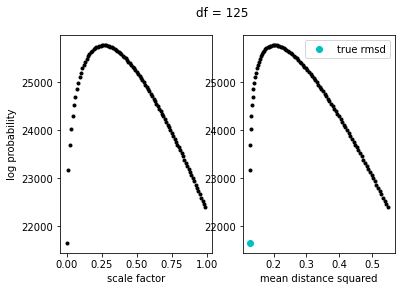

In [63]:
p=125
V = np.eye(p) / p
check.cov(V)
df = p
#X = rv.wishart(ws.key, V, n=df, p=p)
X = sp.stats.wishart.rvs(scale=V, df=df)
check.cov(V)
check.cov(X)

xs, ys, ds, trues = do_experiment(X, V, df, (0, 1), 0.01)
pairplot(xs, ys, ds, df=df, X=X, V=V)

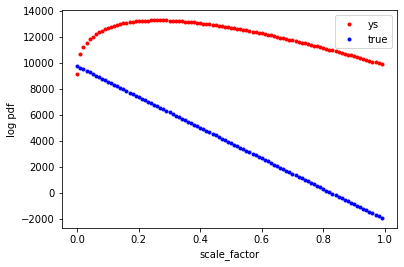

In [66]:
plt.plot(xs, ys - 12500, 'r.', label="ys")
plt.plot(xs, trues, 'b.', label="true")
plt.legend()
plt.ylabel("log pdf")
plt.xlabel("scale_factor")
plt.show()

In [103]:
Y = X + 1
Z = np.array(X)
Z[np.diag_indices(p)] = 3.
W = X + 0.1

def pair_eval(X, V, df):
    return sp.stats.wishart.logpdf(x=X, df=df, scale=V), lwish(X, V, df)

l = 'abcd'
for i, j in enumerate([X, Y, Z, W]):
    x, y = pair_eval(j, V, df)
    le = l[i]
    print(x, y)
    




9759.187642446603 21654.404
1942.3737332455676 14367.783
-5942.917175400402 21802.594
8974.774220693776 21259.004


DeviceArray(21259.004, dtype=float32)

<AxesSubplot:xlabel='mean distance squared'>

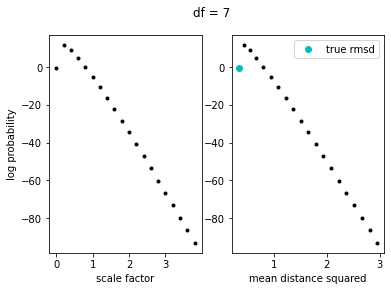

In [15]:
p=7
V = np.eye(p)
df = p
X = rv.wishart(ws.key, V/p, n=df, p=p)
X = np.array(X)
check.cov(V)
check.cov(X)

xs, ys, ds, trues = do_experiment(X, V/p, df, (0, 4), 0.2)
pairplot(xs, ys, ds, df=df, X=X, V=V/p)

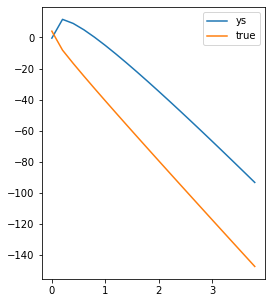

In [16]:
plot_true(xs, ys, trues)

In [ ]:
sp.stats.wishart.pdf(x=V, df=df, scale=V/p)

In [ ]:
np.exp(lwish(X, V/p, df))

In [ ]:


x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=1); w[:5]

c = chi2.pdf(x, 3); c[:5]

plt.plot(x, w)

In [ ]:
plt.plot(x, w)

In [ ]:
plt.plot(x, np.log(w))

In [ ]:
?wishart.logpdf